In [ ]:
import keras

In [ ]:
IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS = 200, 200, 3

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 2 because we have cat and dog classes

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 198, 198, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 99, 99, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)       

In [ ]:
!pip install opendatasets
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
od.download("https://www.kaggle.com/competitions/dogs-vs-cats/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sm745052
Your Kaggle Key: ··········


100%|██████████| 812M/812M [00:05<00:00, 151MB/s]



Extracting archive ./dogs-vs-cats/dogs-vs-cats.zip to ./dogs-vs-cats


In [ ]:
!unzip /content/dogs-vs-cats/train.zip

In [ ]:
!unzip /content/dogs-vs-cats/test1.zip

In [ ]:
import os
import cv2

In [ ]:
X = []
Y = []
for i in os.listdir('train'):
  X.append(cv2.resize(cv2.imread(os.path.join('train', i)), (200, 200), interpolation = cv2.INTER_NEAREST))
  Y.append(i[:3])

In [ ]:
import numpy as np
X = np.array(X)

In [ ]:
model.predict(X[:3])

array([[0.50409657],
       [0.49849713],
       [0.50915325]], dtype=float32)

In [ ]:
y = np.array(list(map(lambda x:1 if x=='cat' else 0, Y))).reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100
          , callbacks = tf.keras.callbacks.EarlyStopping(restore_best_weights=True, patience = 5))

Epoch 1/100
625/625 [==============================] - 47s 73ms/step - loss: 0.6546 - accuracy: 0.6847 - val_loss: 0.5979 - val_accuracy: 0.6724
Epoch 2/100
625/625 [==============================] - 44s 71ms/step - loss: 0.4441 - accuracy: 0.7964 - val_loss: 0.5547 - val_accuracy: 0.7092
Epoch 3/100
625/625 [==============================] - 45s 71ms/step - loss: 0.3679 - accuracy: 0.8431 - val_loss: 0.4548 - val_accuracy: 0.7760
Epoch 4/100
625/625 [==============================] - 45s 71ms/step - loss: 0.2969 - accuracy: 0.8759 - val_loss: 0.9623 - val_accuracy: 0.6124
Epoch 5/100
625/625 [==============================] - 45s 71ms/step - loss: 0.2387 - accuracy: 0.9056 - val_loss: 0.4572 - val_accuracy: 0.7848
Epoch 6/100
625/625 [==============================] - 45s 72ms/step - loss: 0.1854 - accuracy: 0.9270 - val_loss: 0.6314 - val_accuracy: 0.7886
Epoch 7/100
625/625 [==============================] - 45s 72ms/step - loss: 0.1551 - accuracy: 0.9420 - val_loss: 0.4119 - val_ac

In [ ]:
ad = 0x7f7664412510

In [ ]:
import ctypes
ctypes.cast(ad, ctypes.py_object).value.history

{'accuracy': [0.6846500039100647,
  0.7964000105857849,
  0.8430500030517578,
  0.8759499788284302,
  0.9056000113487244,
  0.927049994468689,
  0.9419500231742859,
  0.9544000029563904,
  0.9581999778747559,
  0.9620500206947327,
  0.9674500226974487,
  0.9658499956130981],
 'loss': [0.6546404957771301,
  0.4441259205341339,
  0.3678671419620514,
  0.2968542277812958,
  0.23866775631904602,
  0.1854216307401657,
  0.15506458282470703,
  0.12385348230600357,
  0.11431068181991577,
  0.10020580142736435,
  0.09082944691181183,
  0.09732642024755478],
 'val_accuracy': [0.6723999977111816,
  0.7092000246047974,
  0.7760000228881836,
  0.6123999953269958,
  0.7847999930381775,
  0.7886000275611877,
  0.8453999757766724,
  0.7351999878883362,
  0.847599983215332,
  0.8055999875068665,
  0.859000027179718,
  0.8306000232696533],
 'val_loss': [0.5978668928146362,
  0.5547251105308533,
  0.45477232336997986,
  0.9623266458511353,
  0.4571598768234253,
  0.6314035654067993,
  0.411896675825119,

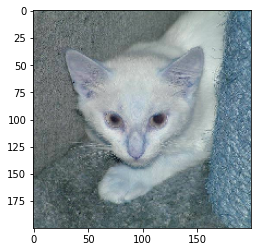

In [33]:
import matplotlib.pyplot as plt
plt.imshow(X[9100])

In [34]:
model.predict(X[9100:9101])

array([[0.9855607]], dtype=float32)

In [35]:
#0>dog, 1>cat